## EDUNET FOUNDATION - Self-Practice Exercise Notebook

### LAB 25 - Implementing a full-fledged project  Concepts in Python

<center><h1> Wine Quality Classification
</h1></center>



<h2> A little about Red Wine</h2>


Red wine has been part of social, religious, and cultural events for hundreds of years.

Red wine is made by crushing and fermenting dark-colored, whole grapes.

There are many types of red wine, which vary in taste and color. Common varieties include Shiraz, Merlot, Cabernet sauvignon, Pinot noir and Zinfandel.

The alcohol content usually ranges from 12–15%.

We can get the data set from [Kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset?select=WineQT.csv).

<h2> Understand about Dataset</h2>

Understanding the different features of wine, we see that there are a total of 12 columns including the final quality parameter. Let us try to find out what these columns mean and how do they contribute in determing the quality of the red wine!

* **Fixed Acidity:** are non-volatile acids that do not evaporate readily

* **Volatile Acidity:** are high acetic acid in wine which leads to an unpleasant vinegar taste

* **Citric Acid:** acts as a preservative to increase acidity. When in small quantities, adds freshness and flavor to wines

* **Residual Sugar:** is the amount of sugar remaining after fermentation stops. The key is to have a perfect balance between sweetness and sourness. It is important to note that wines > 45g/ltrs are sweet

* **Chlorides:** the amount of salt in the wine

* **Free Sulfur Dioxide:** it prevents microbial growth and the oxidation of wine

* **Total Sulfur Dioxide:** is the amount of free + bound forms of SO2

* **Density:** sweeter wines have a higher density

* **pH:** describes the level of acidity on a scale of 0–14. Most wines are always between 3–4 on the pH scale

* **Alcohol:** available in small quantities in wines makes the drinkers sociable

* **Sulphates:** a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant

* **Quality:** which is the output variable/predictor


Now we have a basic knowledge of various factors that influence the quality of good wine, Shall we drink to that? 🥂

## Now let's start with EDA first and then we go with Model prediction.

### Import modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
wine_df = pd.read_csv('winequality-red.csv')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
wine_df.sample(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
483,10.6,0.360,0.60,2.2,0.152,7.0,18.0,0.99860,3.04,1.06,9.4,5
1151,6.1,0.580,0.23,2.5,0.044,16.0,70.0,0.99352,3.46,0.65,12.5,6
1051,8.5,0.460,0.59,1.4,0.414,16.0,45.0,0.99702,3.03,1.34,9.2,5
1104,8.0,0.480,0.34,2.2,0.073,16.0,25.0,0.99360,3.28,0.66,12.4,6
805,8.2,0.280,0.40,2.4,0.052,4.0,10.0,0.99356,3.33,0.70,12.8,7
843,7.1,0.685,0.35,2.0,0.088,9.0,92.0,0.99630,3.28,0.62,9.4,5
549,9.0,0.530,0.49,1.9,0.171,6.0,25.0,0.99750,3.27,0.61,9.4,6


In [5]:
print(wine_df.columns)
print(wine_df.shape)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


As of now, we can see thay there are no null values in dataset. 

In [8]:
# statistical info
wine_df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


**A few observations:**

* The quality of wine varies from 3 to 8, where 6 is the average quality.
* The maximum alcohol level in the wine is 14.9 and minimum is 8.4
* The pH level of wine varies between 2.74 to 4.01.
* The average density of wine is 0.9956.
* Total sulpher dioxide varies between 6.0 to 289.0.

In [11]:
# check for null values
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


<Axes: xlabel='quality', ylabel='count'>

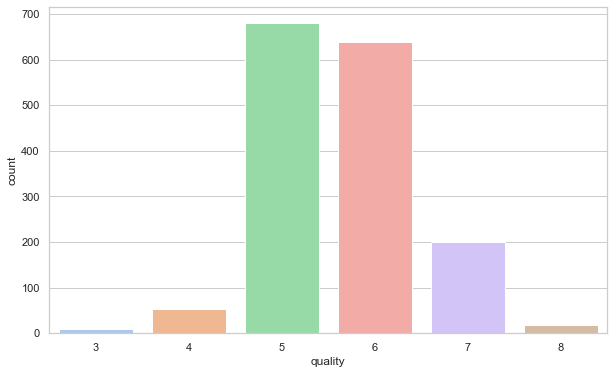

In [12]:
sns.set(style="whitegrid")
print(wine_df['quality'].value_counts())
fig = plt.figure(figsize = (10,6))
sns.countplot(x='quality',data=wine_df, palette='pastel')

The number of ratings for wine quality '5' and '6' are more than 10 times of that of '3' , '4' and '8'. If we leave it as it is, it might create some problem  for us in predicting the quality of the wine. Alternatively, we can also undersample the category '5' and '6' and oversample the remaining ones.

Anyway, we'll decide it later.

<Axes: >

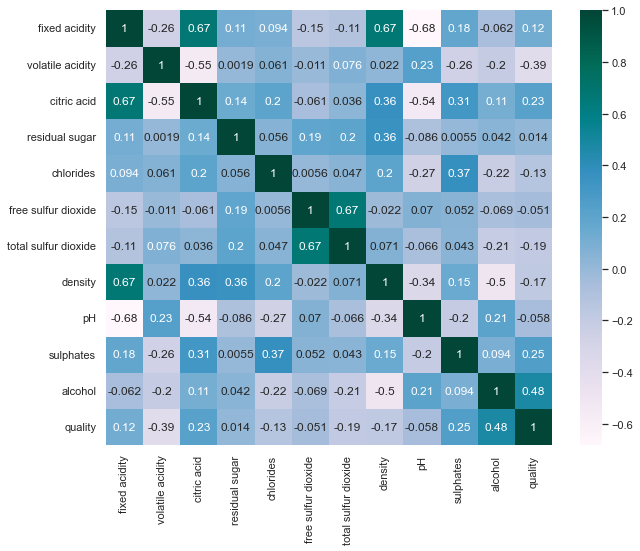

In [13]:
plt.figure(figsize = (10,8))
sns.heatmap(wine_df.corr(),annot=True, cmap= 'PuBuGn')

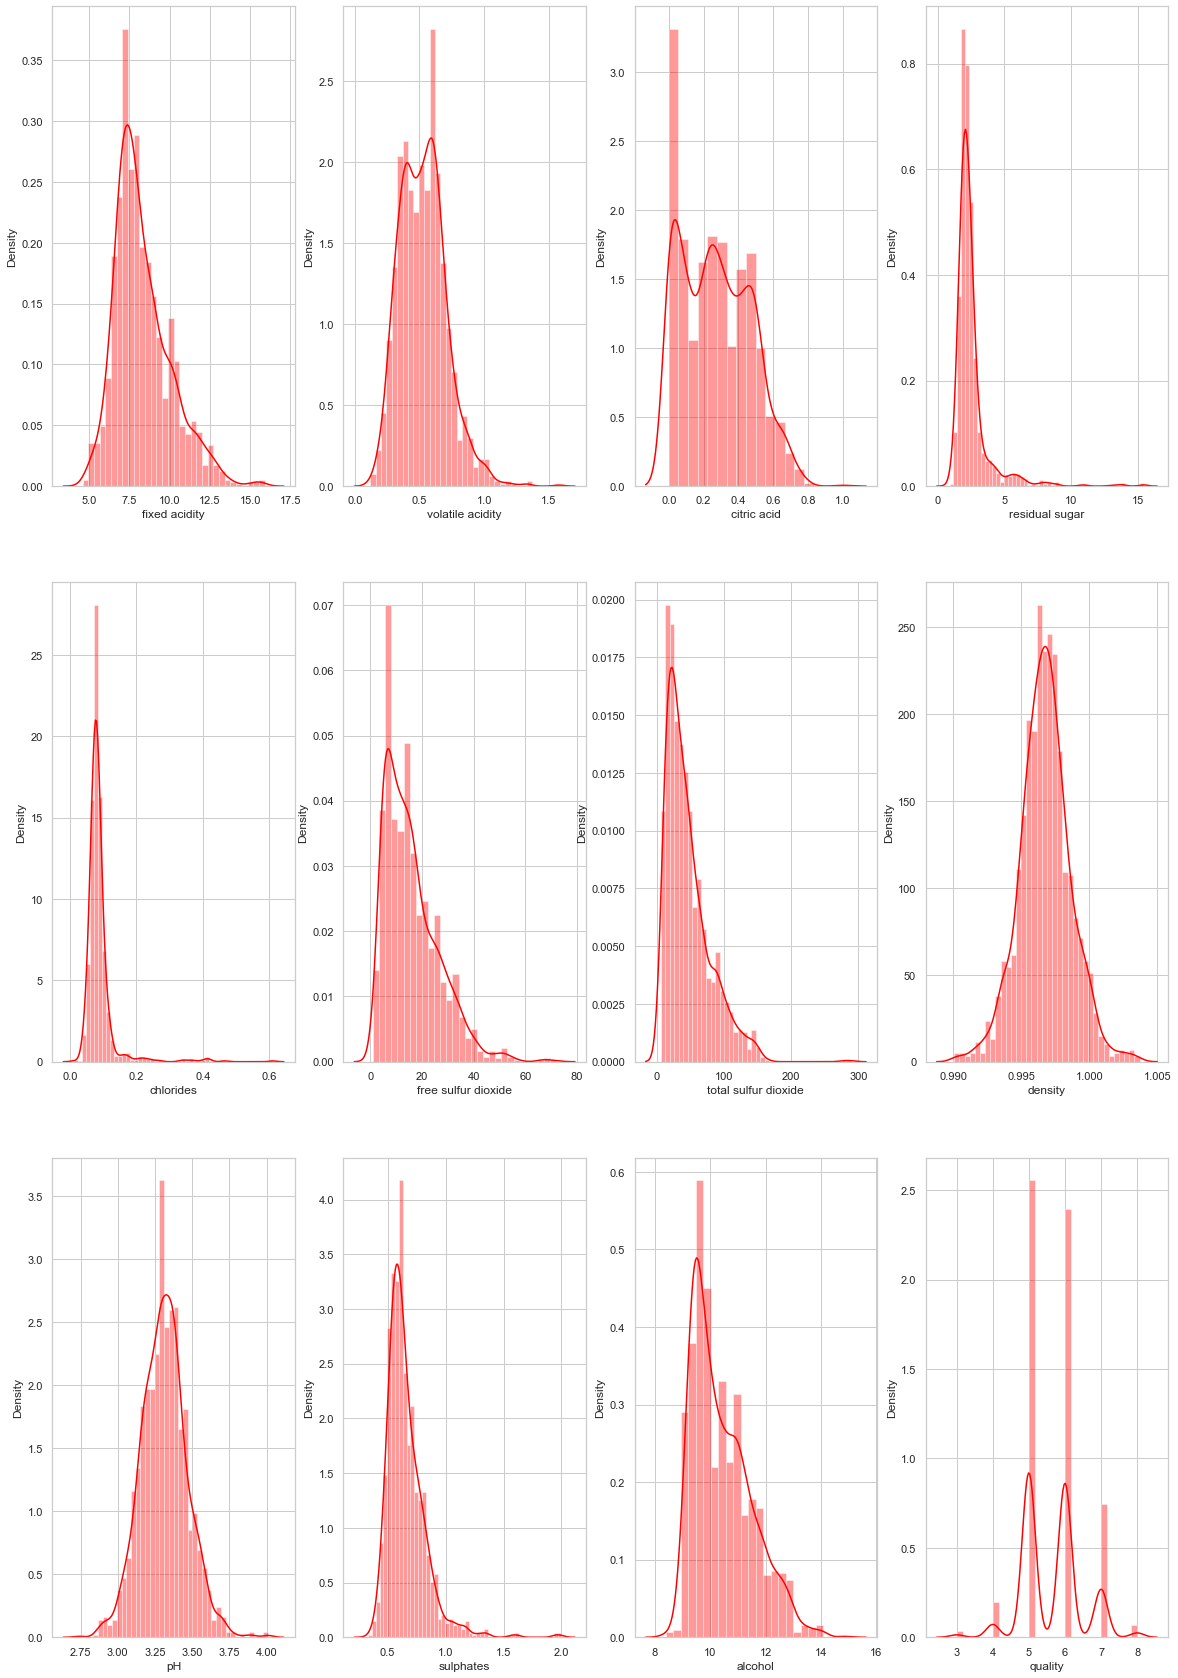

In [14]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(20,30))
k = 0
columns = list(wine_df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(wine_df[columns[k]], ax = ax1[i][j], color = 'red')
            k += 1
plt.show()

**Observation:** We see that some of our columns are highly skewed towards right. These columns include Residual Sugar, Chlorides, Free Sulphur Dioxide, Total Sulphur Dioxide, and Sulphates. So we need to tranform it. Applying a log transfrom will solve the problem!

In [15]:
def log_transform(col):
    return np.log(col[0])

wine_df['residual sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free sulfur dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total sulfur dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)

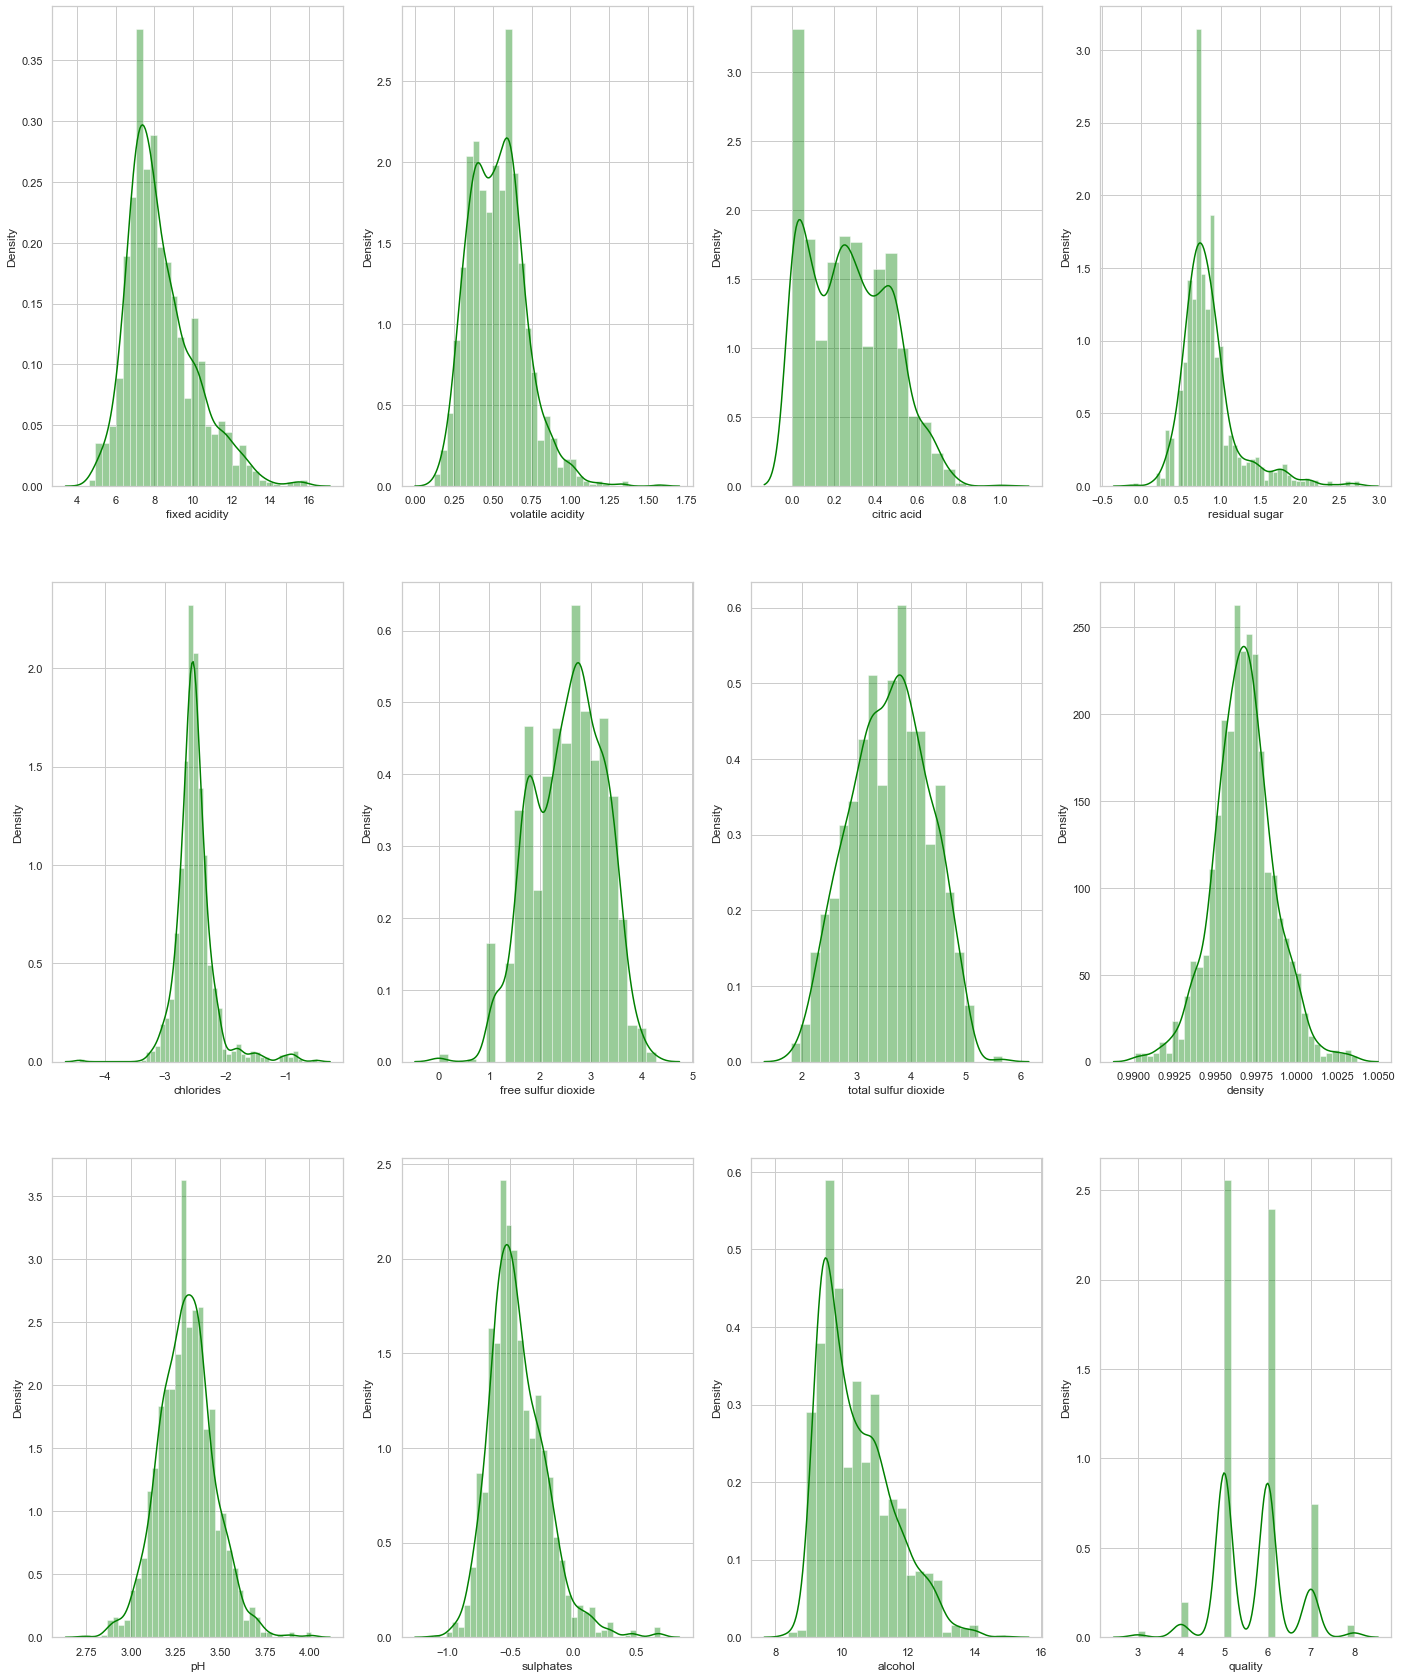

In [16]:
color = sns.color_palette("pastel")

fig, ax1 = plt.subplots(3,4, figsize=(24,30))
k = 0
columns = list(wine_df.columns)
for i in range(3):
    for j in range(4):
            sns.distplot(wine_df[columns[k]], ax = ax1[i][j], color = 'green')
            k += 1
plt.show()

Now the features are normally distributed. Now we can move forward.

In [17]:
wine_df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.476166
sulphates               0.308642
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.023533
free sulfur dioxide    -0.050087
pH                     -0.057731
total sulfur dioxide   -0.170143
density                -0.174919
chlorides              -0.176140
volatile acidity       -0.390558
Name: quality, dtype: float64

**Observation:** Although none of the columns show high correlation with the target colummn, we can say that Alcohol, Sulphates, citric acid, fixed acidity have the highest correlations.

## Split the data

In [18]:
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

In [19]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Bythis we can see that, data is imblanced. We need to balance the data by using sampling.

In [20]:
!pip install imblearn

In [21]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(X.fillna(0), y)

In [22]:
y.value_counts()

quality
5    681
6    681
7    681
4    681
8    681
3    681
Name: count, dtype: int64

We can see that the count of all of our quality categories have been made equal!

In [23]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    return model.score(x_test, y_test) * 100
    #print("Accuracy:", model.score(x_test, y_test) * 100)
    
#     # cross-validation
#     score = cross_val_score(model, X, y, cv=5)
#     print("CV Score:", np.mean(score)*100)

## Apply LogisticRegression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
LinearReg_acc=classify(model, X, y)
LinearReg_acc

50.391389432485326

## Apply DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
DecTree_acc=classify(model, X, y)
DecTree_acc

78.76712328767124

## Apply RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
RanFor_acc=classify(model, X, y)
RanFor_acc


85.12720156555773

## Apply SupportVectorMachine

In [27]:
from sklearn.svm import SVC
model = SVC(kernel='rbf', random_state = 1)
SVM_acc=classify(model, X, y)
SVM_acc

46.86888454011742

In [28]:
Accuracy = [LinearReg_acc, DecTree_acc,RanFor_acc,SVM_acc]
models = ['LogisticRegression', 'DecisionTreeClassifier' , 'RandomForestClassifier', 'Support Vector Machine']

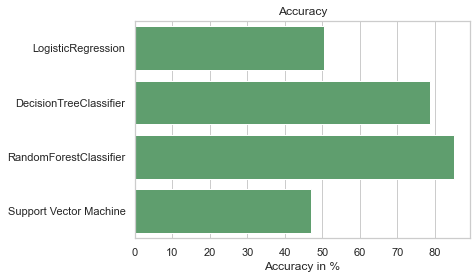

In [29]:
sns.barplot(x=Accuracy, y=models, color="g")
plt.xlabel('Accuracy in %')
plt.title('Accuracy')
plt.show()

`RandomForestClassifier` won the rece with 86%.

## Save RandomForestClassifier Model by using Pickel

In [30]:
from sklearn.ensemble import RandomForestClassifier
RanFor_model = RandomForestClassifier()
RanFor_acc=classify(RanFor_model, X, y)
RanFor_acc

85.22504892367905

In [31]:
import pickle

In [32]:
# save the model to disk
filename = 'finalRF_model.sav'
pickle.dump(RanFor_model, open(filename, 'wb'))

In [33]:
# Load the Model back from file
with open(filename, 'rb') as file:  
    RF_Model = pickle.load(file)

RF_Model

RandomForestClassifier()

In [34]:
np.log([7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4])

array([ 2.00148000e+00, -3.56674944e-01,            -inf,  6.41853886e-01,
       -2.57702194e+00,  2.39789527e+00,  3.52636052e+00, -2.20242356e-03,
        1.25561604e+00, -5.79818495e-01,  2.24070969e+00])

In [36]:
RF_Model.predict([[ 2.00148000e+00, -3.56674944e-01,            0,  6.41853886e-01,
       -2.57702194e+00,  2.39789527e+00,  3.52636052e+00, -2.20242356e-03,
        1.25561604e+00, -5.79818495e-01,  2.24070969e+00]]) # actual label is 5

array([5], dtype=int64)

In [ ]:
RF_Model.predict([[ 2.41591378e+00, -1.27296568e+00, -5.79818495e-01,  6.41853886e-01,
       -2.59026717e+00,  2.83321334e+00,  4.09434456e+00, -2.00200267e-03,
        1.15057203e+00, -5.44727175e-01,  2.28238239e+00]]) # actual label is 5

In [ ]:
RF_Model.predict([[ 2.39789527e+00, -1.20397280e+00, -5.44727175e-01,  7.41937345e-01,
       -2.91877123e+00,  1.94591015e+00,  2.94443898e+00, -2.00200267e-03,
        1.19694819e+00, -1.27833372e-01,  2.35137526e+00]]) # actual label is 7

In [ ]:
RF_Model.predict([[ 2.70805020e+00, -1.56064775e+00, -8.20980552e-01,  7.88457360e-01,
       -2.59026717e+00,  2.30258509e+00,  3.17805383e+00,  4.99987500e-05,
        1.12167756e+00, -1.74353387e-01,  2.21920348e+00]]) # actual label is 7

In [ ]:
RF_Model.predict([[10.0,0.31,0.47,2.6,0.085,14.0,33.0,0.99965,3.36,0.8,10.5]]) # actual label is 7

## References

- https://www.kaggle.com/code/yasserh/wine-quality-prediction-comparing-top-ml-models
- https://www.kaggle.com/code/mohitgoyal522/wine-quality-data-analysis-and-prediction
- https://www.kaggle.com/code/nikunjmalpani/wine-quality-prediction-imbalanced-data
- https://medium.com/codersarts/wine-quality-prediction-with-machine-learning-2a92567ad2a
    

<center><h2> Happy Learning </h2></center>